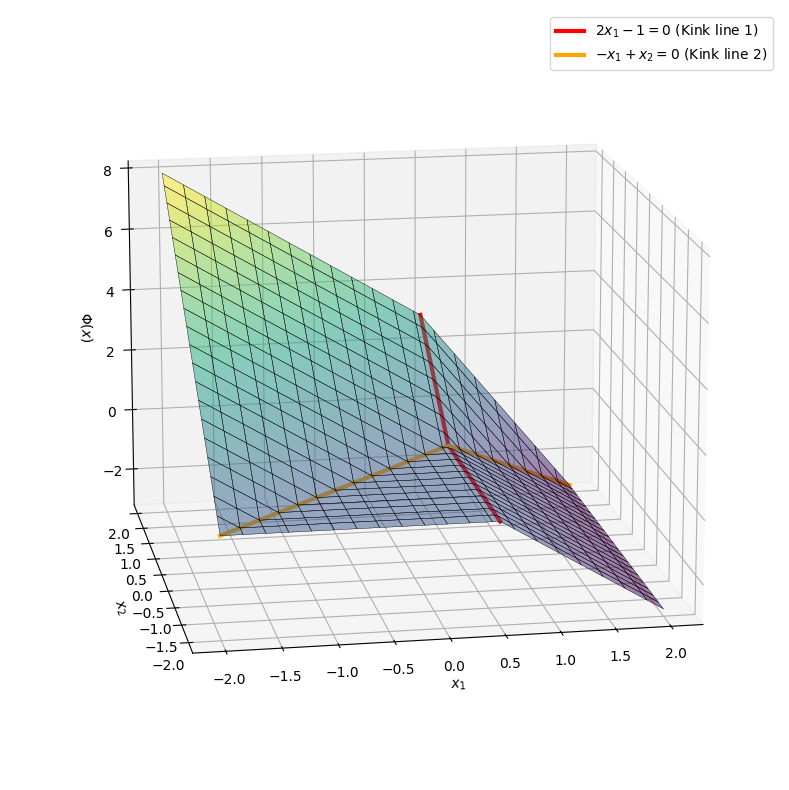

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A1 = np.array([[2, 0], 
               [-1, 1]])
b1 = np.array([[-1], 
               [0]])
A2 = np.array([[-1, 2]]) 
b2 = 0

def ReLU(x):
    
				return np.maximum(x, 0) 
    # return np.where(x >= 0, 1, -1)

    

def shallow_nn(x1, x2):
    # Gathering the input in a vector x
    vals = np.zeros(x1.shape)
    
    for i in range(x1.shape[0]):
        for j in range(x1.shape[1]):
            x_vec = np.array([[x1[i,j]], [x2[i,j]]])
            
            # Layer 1: Affine transformation + ReLU
            z1 = A1 @ x_vec + b1
            a1 = ReLU(z1)
            
            # Layer 2: Affine transformation
            output = A2 @ a1 + b2
            
            vals[i,j] = output[0,0]
            
    return vals

x_range = np.linspace(-2, 2, 80)
y_range = np.linspace(-2, 2, 80)
X, Y = np.meshgrid(x_range, y_range)
Z = shallow_nn(X, Y)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', 
                       edgecolor='k', linewidth=0.3, alpha=0.5,
                       rcount=20, ccount=20, antialiased=True)

# Lines where the ReLU has a "kink" (where it changes suddenly from 0 to positive values)
y_vals = np.linspace(-2, 2, 100)
x_vals_1 = np.full_like(y_vals, 0.5)
z_vals_1 = shallow_nn(np.array([x_vals_1]), np.array([y_vals]))[0]
x_vals_2 = np.linspace(-2, 2, 100)
y_vals_2 = x_vals_2
z_vals_2 = shallow_nn(np.array([x_vals_2]), np.array([y_vals_2]))[0]

ax.plot(x_vals_1, y_vals, z_vals_1, color='red', linewidth=3, label='$2x_1 - 1 = 0$ (Kink line 1)')
ax.plot(x_vals_2, y_vals_2, z_vals_2, color='orange', linewidth=3, label='$-x_1 + x_2 = 0$ (Kink line 2)')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$\Phi(x)$')
ax.legend()
ax.view_init(elev=15, azim=-100) 

plt.tight_layout()
plt.show()